<a href="https://colab.research.google.com/github/Baldros/Supervisioned-Learning/blob/main/EstudoPreprocessamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apresentação:

    Aqui estudaremos alguns tópicos relacionados a preparação
    do conjunto de dados para a utilização de soluções de Machine
    Learning.

    Vale dizer que aqui será apenas feito uma análise superficial
    dos tópicos apresentados, sendo cada tópico por si só passível
    de um curso inteiro só para ele.

# Preparando o dataset:

    Usaremos um dataset externo nesse notebook,
    porque os datasets de treinamento do fornecidos
    pela API do SKlearn já veem com bem comportados.


In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import Line2D

In [ ]:
df = pd.read_csv('drug200.csv');df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


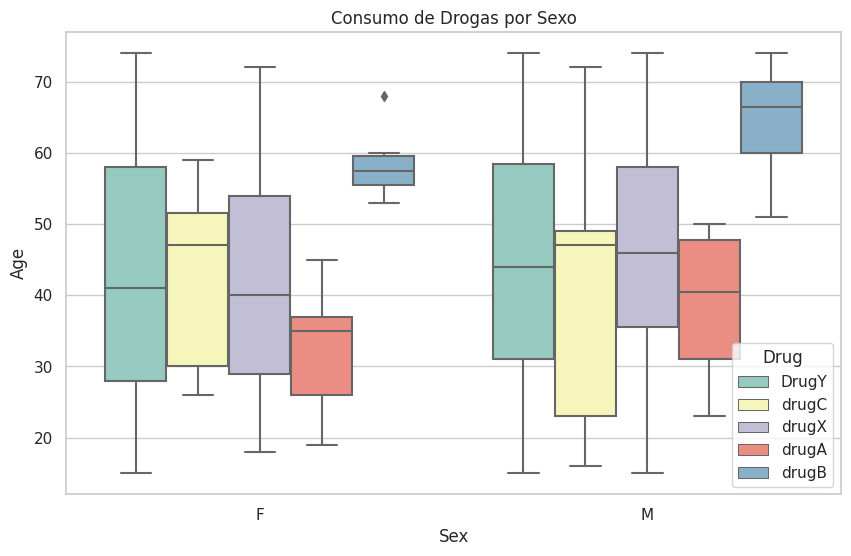

In [ ]:
# Setando o estilo
sns.set(style="whitegrid")

# Criando Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Sex", y="Age", hue="Drug", data=df, palette="Set3")
plt.title("Consumo de Drogas por Sexo")
plt.show()

# Lidando com variáveis categóricas:

    Existem várias formas de se lidar com variáveis categóricas,
    uma delas é fragmentar a variável em respostas binárias. É uma
    solução possivel, porém tem-se que ter cuidado, pois ela aumenta
    a dimensionalidade do dataset, aumentando assim a complexidade
    para o algoritmo de Machine Learning que se utilizará.

    Contudo, a solução é bem simples:

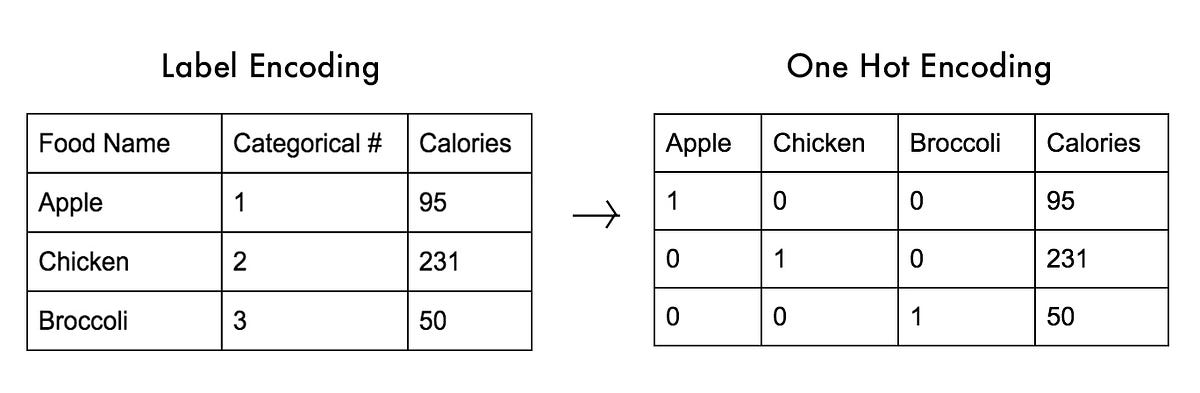



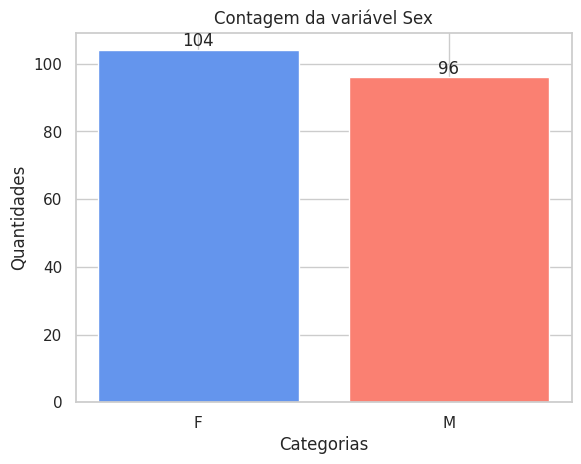

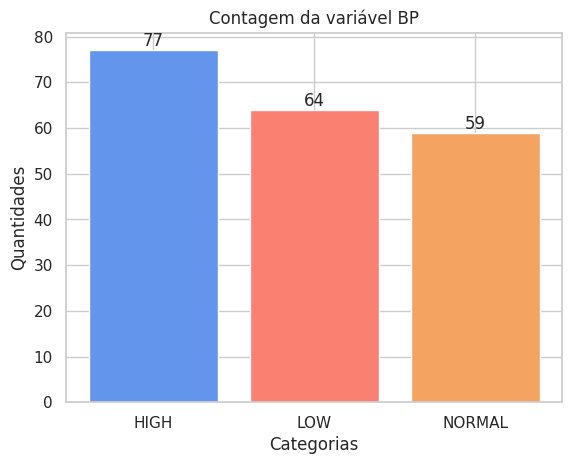

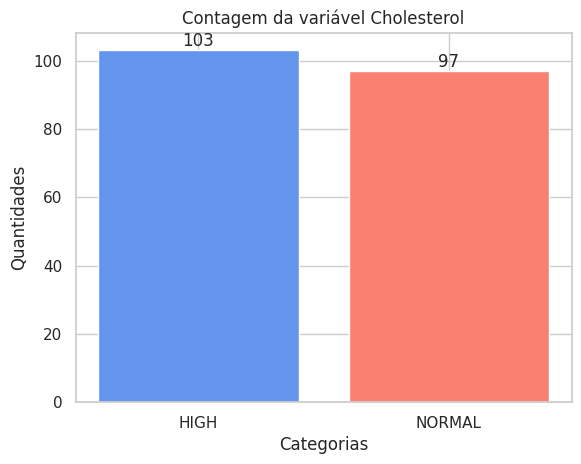

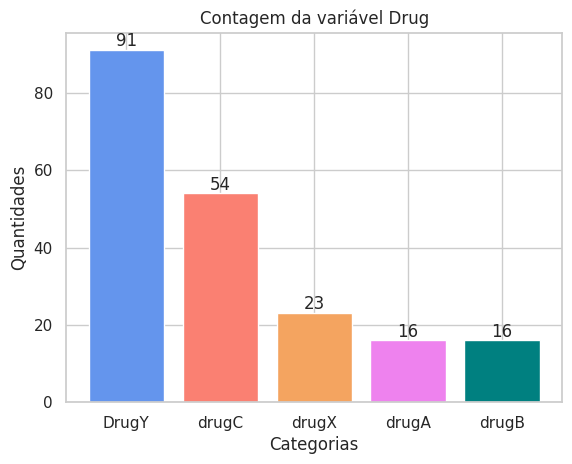

In [ ]:
# Contando as variáveis Categóricas:
for var in df.columns:
  if df[var].dtype == 'object':
    fig, ax = plt.subplots()

    elements = df[var].unique()
    counts = df[var].value_counts()

    labels_color = ['#6495ED','#FA8072','#F4A460','#EE82EE','#008080','#FFFAFA','#F0FFFF']

    bars = ax.bar(elements, counts, color=labels_color)
    ax.set_ylabel('Quantidades')
    ax.set_xlabel('Categorias')
    ax.set_title(f'Contagem da variável {var}')

    # Adicione as contagens nas colunas
    for bar, count in zip(bars, counts):
      yval = bar.get_height()
      ax.text(bar.get_x() + bar.get_width()/2, yval, int(count), ha='center', va='bottom')

    plt.show()

## OneHotEnconding:

    O OneHotEnconding é uma solução da API do SKlearn,
    e pode ser util para ajudar na automação da nossa
    codificação.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Cria uma instância do OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Ajusta e transforma os dados categóricos
encoded_data = encoder.fit_transform(df[['Sex', 'Drug']])

# Obtém os nomes das colunas após a transformação
column_names = encoder.get_feature_names_out(['Sex', 'Drug'])

# Cria um novo DataFrame com as variáveis codificadas
encoded_df = pd.DataFrame(encoded_data, columns=column_names)

# Concatena o DataFrame original com o DataFrame codificado
df_encoded = pd.concat([df, encoded_df], axis=1)

# Exibe o DataFrame resultante
display(df_encoded.head())

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Sex_M,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX
0,23,F,HIGH,HIGH,25.355,DrugY,0.0,0.0,0.0,0.0,0.0
1,47,M,LOW,HIGH,13.093,drugC,1.0,0.0,0.0,1.0,0.0
2,47,M,LOW,HIGH,10.114,drugC,1.0,0.0,0.0,1.0,0.0
3,28,F,NORMAL,HIGH,7.798,drugX,0.0,0.0,0.0,0.0,1.0
4,61,F,LOW,HIGH,18.043,DrugY,0.0,0.0,0.0,0.0,0.0


    Note que é meio complicadinho usar o OneHotEnconding pelo SKlearn,
    porém, por sorte, existe uma solução mais simples. Que é pela prórpria
    biblioteca pandas.

## get_dummies:

    Em essência, esse método faz a mesma coisa do OneHotEnconding,
    só que agora pelo Pandas, que deixa esse processo um pouco mais
    fácil de se fazer.

In [ ]:
# Codificando uma unica variável:
df_dummies_Drug = pd.get_dummies(df['Drug'],drop_first=True);df_dummies_Drug.head()

,drugA,drugB,drugC,drugX
0,0,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,0,0


**Note**


```
  Note que ele some com uma das categoria,
ou seja, é uma técnica que requer um certo
cuidado e atenção ao ser usada.
```



In [ ]:
# Codificando o dataset:
df_dummies= pd.get_dummies(df,drop_first=True);df_dummies.head()

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX
0,23,25.355,0,0,0,0,0,0,0,0
1,47,13.093,1,1,0,0,0,0,1,0
2,47,10.114,1,1,0,0,0,0,1,0
3,28,7.798,0,0,1,0,0,0,0,1
4,61,18.043,0,1,0,0,0,0,0,0


In [ ]:
print(df.shape)
print(df_dummies.shape)

(200, 6)
(200, 10)


    Note como aumentou a dimensionalidade... É interessante
    notar também que ele só atuou sobre variáveis categóricas,
    ou seja, só atuou sobre "strings", valures numéricos
    não são alterados.

    Outro ponto importante é que isso é uma técnica, pode, e algumas
    vezes é recomendado que seja feito de forma manual para o melhor
    entendimento do processo.

## Aplicando uma Regressão:

    A ideia aqui é aplicar uma regressão mais a título
    de demonstração mesmo, sem muito apego a qualidade.



In [ ]:
from sklearn.model_selection import cross_val_score, KFold,train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# Separando os dados:
X = df_dummies.drop(['Drug_drugA','Drug_drugB','Drug_drugC','Drug_drugX'],axis=1).values
y = df_dummies['Drug_drugA'].values

In [ ]:
# Preparando os dados:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Construind a instância do Modelo e fazendo validação Cruzada:
linreg = LinearRegression()
linreg_cv = cross_val_score(linreg, X_train,y_train,cv=kf,
                            scoring="neg_mean_squared_error")

In [ ]:
print(np.sqrt(-linreg_cv))

[0.23071771 0.32900867 0.20196733 0.23901046 0.33454306]


**Nota**


```
  introduzimos um sinal de negativo porque estamos trabalhando com
"neg_mean_squared_error", ou seja, o erro quadratico médio negativo.
Esse "neg_mean_squared_error" é uma questão de interpretação, como é
erro, é perda, perda é igual a tirar igual a diminuir... Sinal de
subtração. É mais uma ideia conceitual, entende? Ai, para não ficar
tudo com sinal de menos, as vezes "converter-se" para positivo novamente.
```



# Lidando com Dados Faltantes:

    Lidar com dados faltantes, na minha opinião, é uma
    das tarefas mais simplificadas quando o assunto é
    Ciência de Dados.

    Geralmente o NaN (Not a Number) é o cara entendido como faltante
    e de fato é mesmo, porque o NaN representa um bit vazio. Porém,
    para inicio de conversa, há um certo carater interpretativo
    do que seja um dado faltante. Geralmente a galera bate muito
    no NaN, que é o mais óbivo... Mas você pode ter um bit não
    vazio, ou seja, um valor, que não signifique nada, não
    tenha valor semântico no conjunto de dados. Isso pode
    ser considerado um dado faltante, e não é um bit vazio; Um
    dado corrompido pode ser considerado um dado faltante,
    enfim, eu gosto de definir dado faltante (Missing Data)
    como o dado que não tem valor semântico no seu conjunto
    de dados... Ele não diz nada, é vazio de significado.

## Construindo o dataset de estudo:

    Vamos aqui construir um dataset artificial para estudo.

In [ ]:
# Defina o tamanho do dataset
tamanho_dataset = 100

# Crie um array de números inteiros para as variáveis numéricas
num_var1 = np.random.randint(1, 100, tamanho_dataset)
num_var2 = np.random.randint(50, 150, tamanho_dataset)

# Crie uma array de categorias para as variáveis categóricas
cat_var1 = np.random.choice(['A', 'B', 'C'], tamanho_dataset)
cat_var2 = np.random.choice(['X', 'Y', 'Z'], tamanho_dataset)

# Crie um DataFrame usando pandas
df = pd.DataFrame({
    'Num_Var1': num_var1,
    'Num_Var2': num_var2,
    'Cat_Var1': cat_var1,
    'Cat_Var2': cat_var2
})

# Introduza valores NaN em algumas colunas
colunas_com_nan = ['Num_Var1', 'Cat_Var2']
df[colunas_com_nan] = df[colunas_com_nan].applymap(lambda x: np.nan if np.random.rand() < 0.2 else x)

# Visualize o DataFrame
display(df.head())

,Num_Var1,Num_Var2,Cat_Var1,Cat_Var2
0,8.0,87,C,Z
1,NaN,51,C,X
2,24.0,133,A,Z
3,74.0,95,A,X
4,72.0,95,A,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Num_Var1  81 non-null     float64
 1   Num_Var2  100 non-null    int64  
 2   Cat_Var1  100 non-null    object 
 3   Cat_Var2  77 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ KB


In [ ]:
# Contando os valores faltantes:
print(df.isna().sum().sort_values())
print(df.shape)

Num_Var2     0
Cat_Var1     0
Num_Var1    19
Cat_Var2    23
dtype: int64
(100, 4)


## Dropagem de dados faltantes:

    A primeira abordagem é dropar os dados faltantes,
    porém lembre-se que aqui jogamos TODA a linha
    que se encontra o valor faltante fora. Essa
    pode não ser a melhor opção.

In [ ]:
# Método drop:
df_drop = df.copy()

df_drop = df_drop.dropna(subset=["Cat_Var2","Num_Var1"])

# Contando os valores faltantes:
print(df_drop.isna().sum().sort_values())
print(df_drop.shape)

Num_Var1    0
Num_Var2    0
Cat_Var1    0
Cat_Var2    0
dtype: int64
(64, 4)


**Note**


```
  Note como a quantidade de linha reduziu.
reduziu em 36% o dataset, o quanto isso
poderia impactar a nossa predição?
```



## Imputação de Valores:

    Imputação é uma outra solução bem utilizada
    também. Ela ajuda a menter a integridade dimensional do
    dataset, porém é interessante ter noção de como está sendo
    feita essa imputação.

    A API do SKlearn tem soluções interessante para
    imputação de dados. Isso pode ser útil para ter imputações
    com qualidade interessante de modo a não empobrecer a predição.
    

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [ ]:
df_imput = df.copy()

X_cat = df_imput['Cat_Var2'].values.reshape(-1,1)
X_num = df_imput['Num_Var1'].values.reshape(-1,1)
y = df_imput['Num_Var2'].values

In [ ]:
# Imputação de variáveis categóricas:
X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat,y,
                                                            test_size=0.2,
                                                            random_state=12)

imput_cat = SimpleImputer(strategy="most_frequent")
X_train_cat = imput_cat.fit_transform(X_train_cat)
X_test_cat = imput_cat.fit_transform(X_test_cat)

In [ ]:
print(X_train_cat.shape,X_test_cat.shape)

(80, 1) (20, 1)


In [ ]:
# Imputação de variáveis numérica:
X_train_num, X_test_num, y_train, y_test = train_test_split(X_num,y,
                                                            test_size=0.2,
                                                            random_state=12)

imp_num = SimpleImputer() # Por default, imputa pela média.

X_train_num= imput_cat.fit_transform(X_train_num)
X_test_num = imput_cat.fit_transform(X_test_num)

In [ ]:
print(X_train_num.shape,X_test_num.shape)

(80, 1) (20, 1)




```
  Note que de fato não temos perda, mas esse método
é bem voltado para a utilização de Machine Learning.
Se o seu objetivo for simplesmente imputar valores
para completar o proprio dataframe, talvez essa não
seja a melhor opção.
```


```
  Devido a sua capacidade de transformar nossos
dados, os imputadores são conhecidos como transformers (transformadores).
```




In [ ]:
# Juntando as duas variáveis:
X_train = np.appen(X_train_num,X_train_cat, axis=1)
X_test = np.appen(X_test_cat,X_test_num, axis=1)


**Imputando com um pipeline**
```
  Também podemos imputar usando um pipeline, que
é um objeto usado para executar uma série de transformações,
construindo um modelo em um único fluxo de trabalho.
```



```
  Aqui realizaremos uma classificação binária
para elaborarmos a nossa predição.
```





In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [ ]:
dataset = datasets.load_breast_cancer();dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
target = pd.DataFrame(dataset.target, columns=['alvo'])
df = pd.concat([data,target],axis=1);df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,alvo
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# Separando as variáveis:
X = df.drop('alvo',axis=1).values
y = df.alvo.values

In [ ]:
# Construindo os passos do pipeline
steps = [("imputation", SimpleImputer()),
         ("Logistic_regression",LogisticRegression())]

# Criando a instância:
pipeline = Pipeline(steps)

In [ ]:
# Splitado o modelo:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=42)

In [ ]:
# Ajustando o pipeline aos dados:
pipeline.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('imputation', SimpleImputer()),
                ('Logistic_regression', LogisticRegression())])

In [ ]:
# Checando a qualidade do modelo:
pipeline.score(X_test,y_test)

0.9707602339181286


**Observe que**
```
  Em um pipeline, cada etapa, exeto
a última, deve ser um transformador.
```
**Note também que**


```
  O pipeline pode ser usado para implementar
outros tipos de processos. Qualquer etapa
pode ser construida com um pipeline.
```


